# **Get Dataset**

In [2]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle

In [5]:
!cp /content/kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

# Load and Preprocess the Dataset

In [7]:
!kaggle datasets download -d tongpython/cat-and-dog


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 96% 209M/218M [00:01<00:00, 167MB/s]
100% 218M/218M [00:01<00:00, 153MB/s]


In [8]:
!mkdir cat-and-dog
!mv cat-and-dog.zip cat-and-dog

In [9]:
%cd cat-and-dog/

/content/cat-and-dog


In [10]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

# **Import Libraries and Data**

In [11]:
#libraries
import numpy as np
import pandas as pd
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

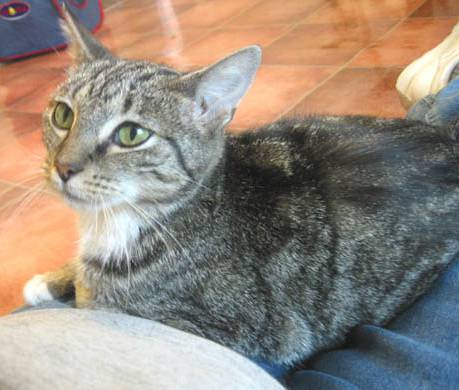

In [13]:
# Display img
import cv2
from google.colab.patches import cv2_imshow
img= cv2.imread('/content/cat-and-dog/test_set/test_set/cats/cat.4028.jpg')
cv2_imshow(img)

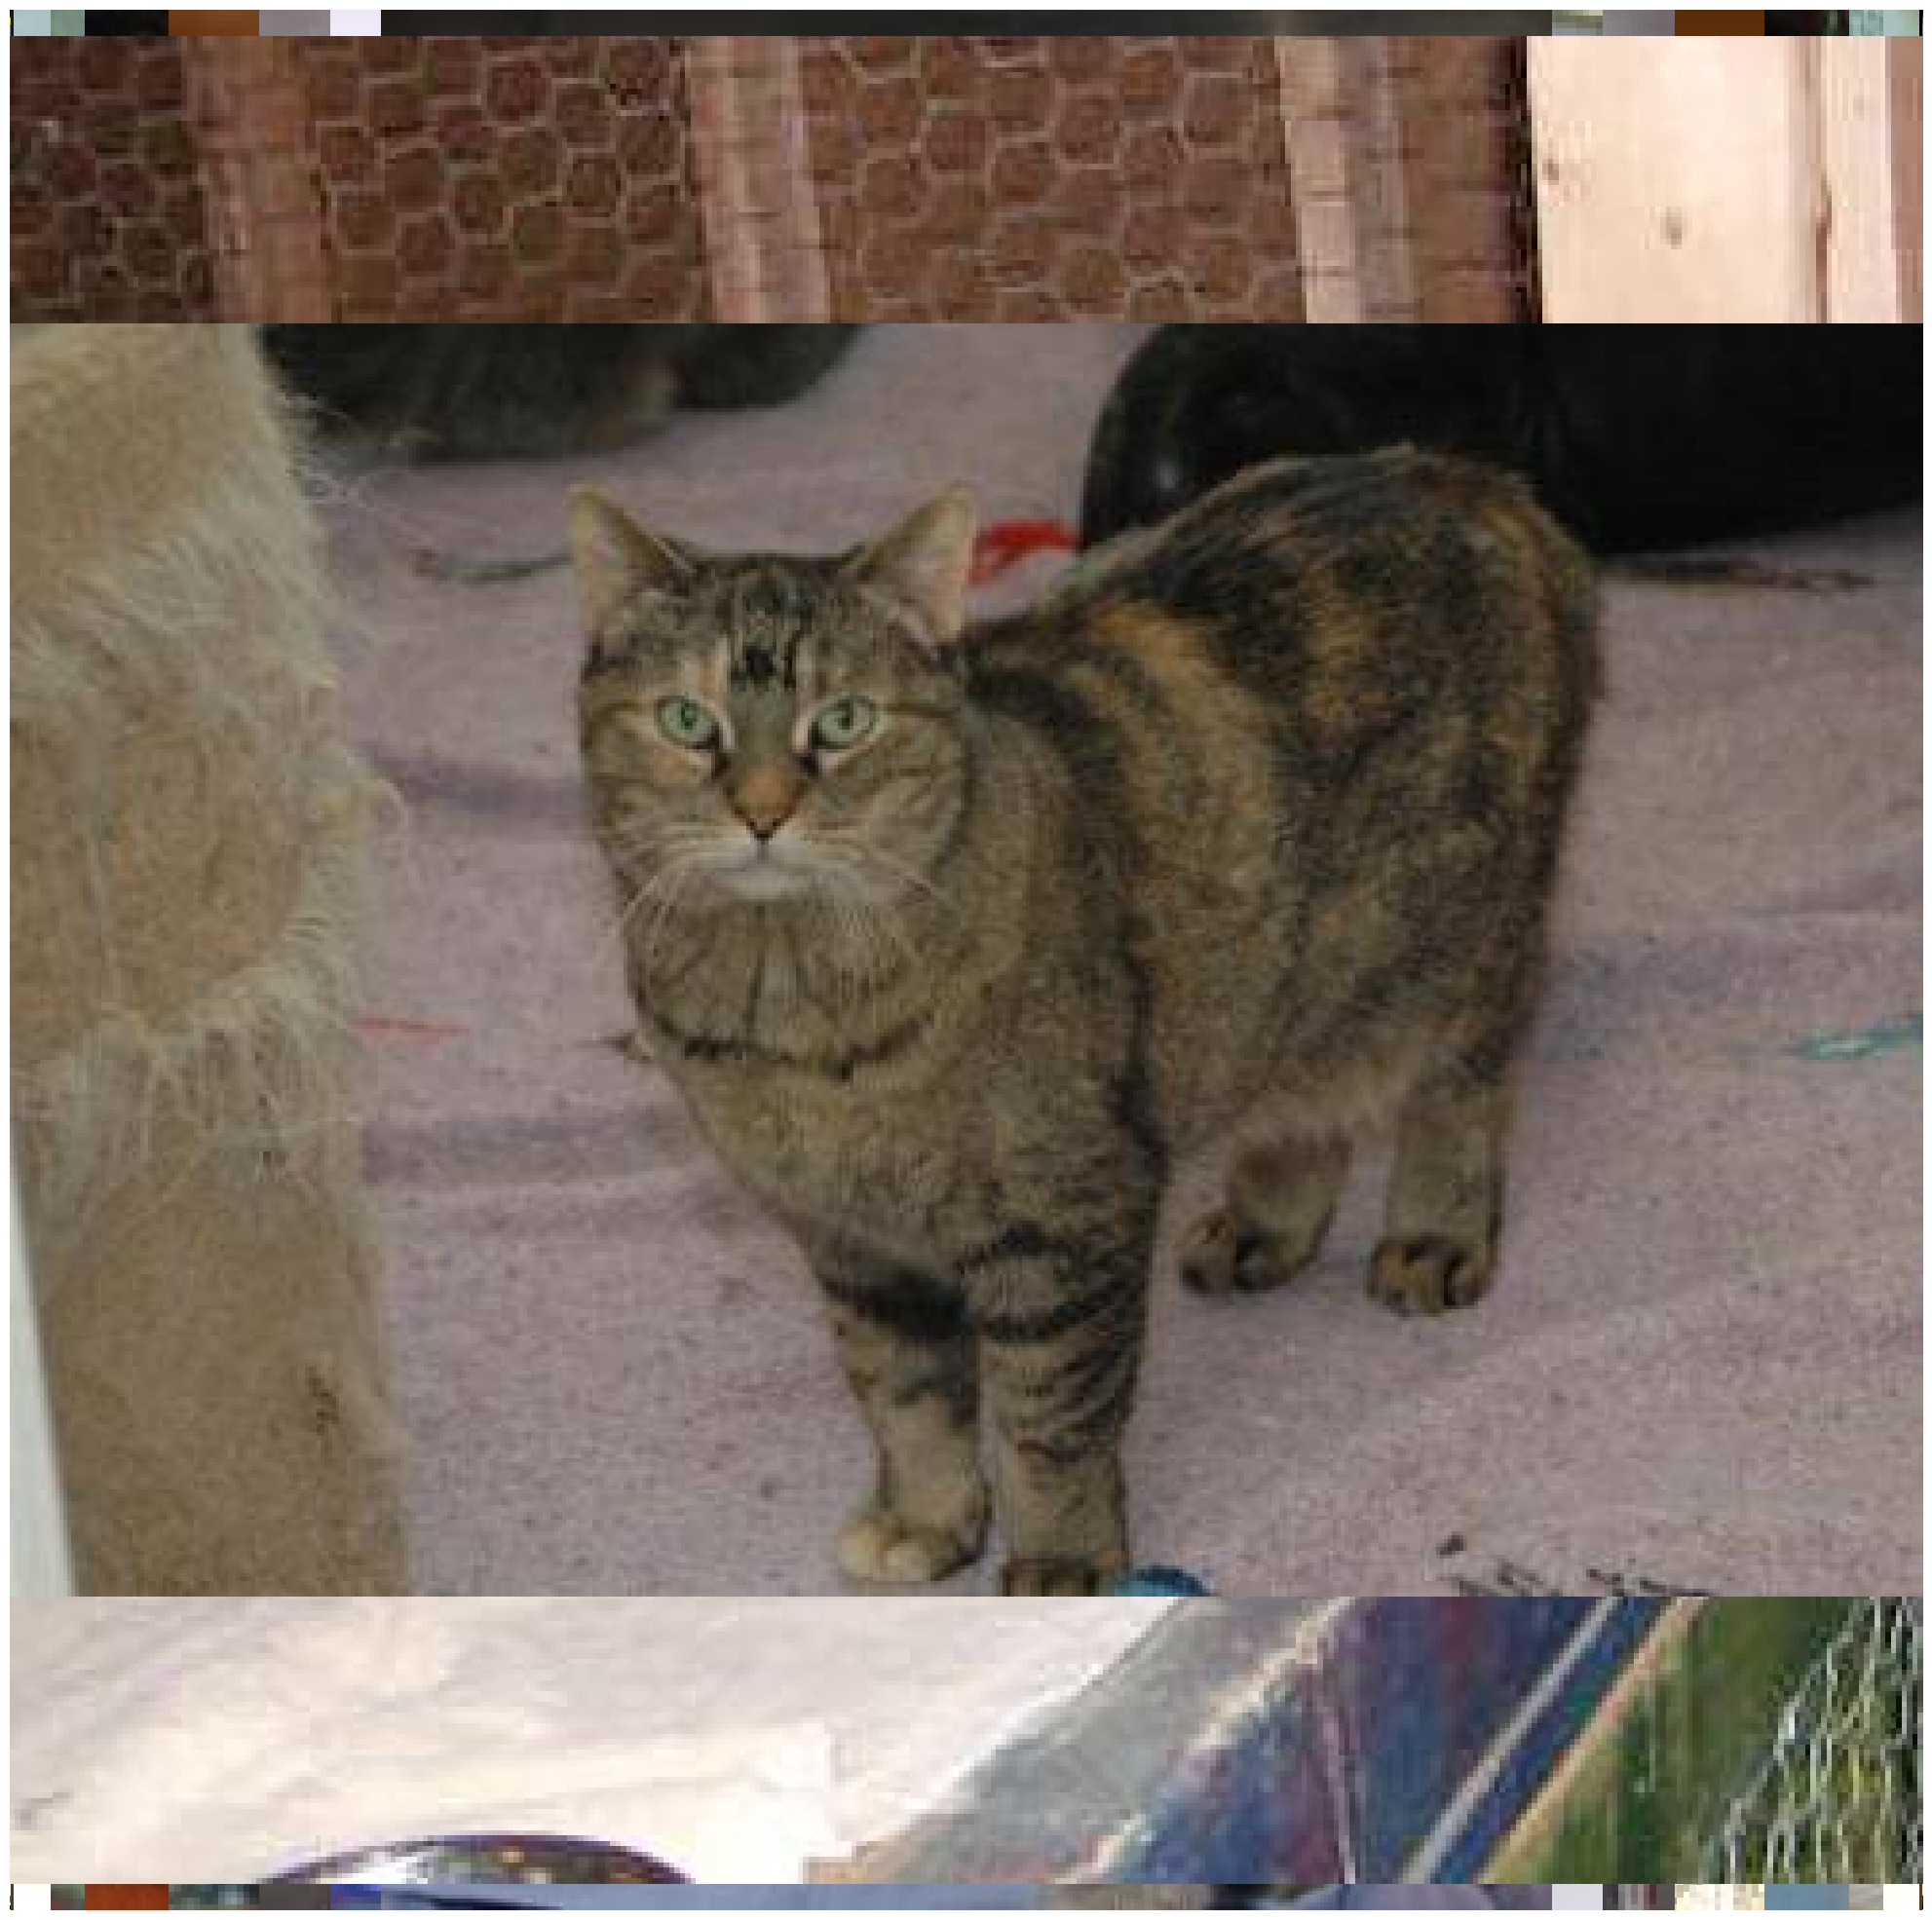

In [14]:
import matplotlib.pyplot as plt
import cv2
import os

# Images Directory
input_dir = '/content/cat-and-dog/test_set/test_set/cats'
output_dir = '/content/cat-and-dog/test_set/test_set/dogs'

# Read all images from the directory
images = [cv2.imread(os.path.join(input_dir, file)) for file in os.listdir(input_dir) if file.endswith(('.jpg', '.jpeg', '.png'))]

# Number of images
num_images = len(images)

# Define the figure size and layout
fig = plt.figure(figsize=(299, 299))
rows = 10
cols = 10

# Display images
for i in range(1, num_images + 1):
    fig.add_subplot(rows, cols, 1)
    plt.imshow(cv2.cvtColor(images[i-1], cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.show()


# **Load Image Data**

In [15]:
train_datagen = ImageDataGenerator(
   rescale=1./299,
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.1,
    fill_mode='reflect',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./299)

In [16]:
train_generator = train_datagen.flow_from_directory(
    'training_set',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'training_set',
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'test_set',
    target_size=(299,299),
    batch_size=32,
    class_mode='binary'
)

Found 6404 images belonging to 1 classes.
Found 1601 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


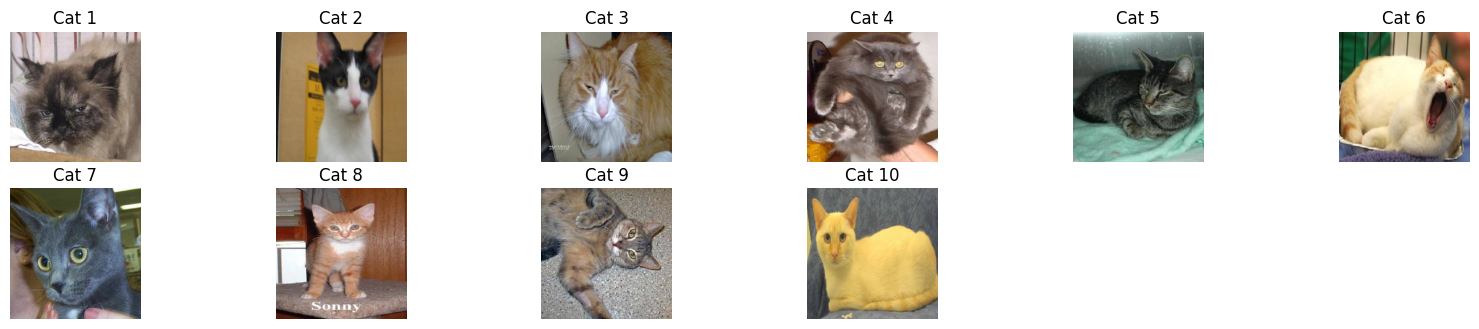

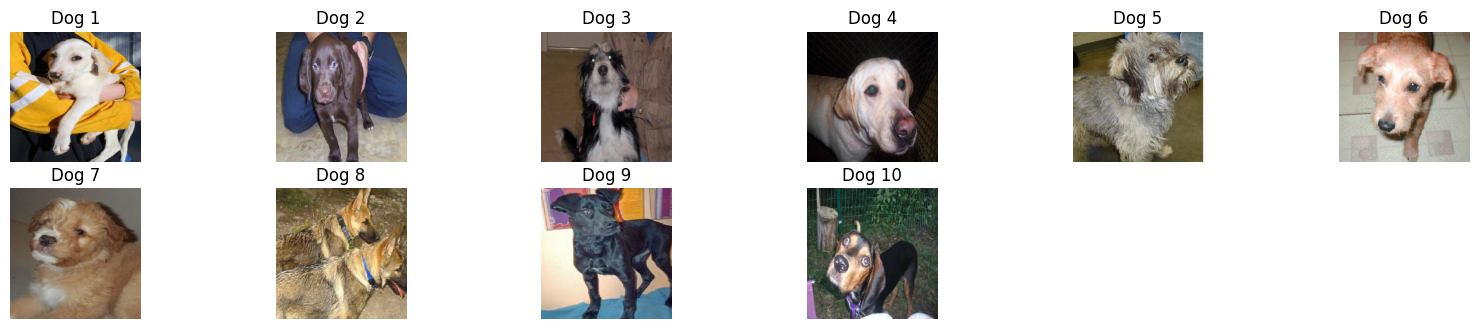

In [35]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img

# Set the paths to your image folders
cat_folder = 'training_set/training_set/cats'
dog_folder = 'training_set/training_set/dogs'

# Function to display images
def display_images(folder, title, n_images=10):
    images = os.listdir(folder)[:n_images]
    plt.figure(figsize=(20,20))
    for i, img_name in enumerate(images):
        img = load_img(os.path.join(folder, img_name), target_size=(299, 299))
        plt.subplot(10, 6, i + 1)
        plt.imshow(img)
        plt.title(f"{title} {i+1}")
        plt.axis('off')
    plt.show()

# Display 10 cat images
display_images(cat_folder, "Cat")

# Display 10 dog images
display_images(dog_folder, "Dog")

# **Modling**

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (3,3),padding='same',activation='relu', input_shape = (299,299,3)))
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2 , padding='same'))

model.add(Conv2D(filters = 64,kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2 , padding='same'))

model.add(Conv2D(filters = 128,kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2) ,strides=2 , padding='same'))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu'))
model.add(Dense(64 , activation = 'relu'))
model.add(Dense(32 , activation = 'relu'))

model.add(Dense(1 , activation = 'sigmoid'))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 299, 299, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 38, 38, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 184832)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,658,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,762,241 (90.65 MB)

 Trainable params: 23,762,241 (90.65 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
ES = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
RL = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(train_generator,epochs = 2, validation_data = val_generator, callbacks=[ES,RL],)

Epoch 1/2
201/201 ━━━━━━━━━━━━━━━━━━━━ 1801s 9s/step - accuracy: 1.0000 - loss: 3.2078e-10 - val_accuracy: 1.0000 - val_loss: 1.2347e-11 - learning_rate: 0.0010
Epoch 2/2
201/201 ━━━━━━━━━━━━━━━━━━━━ 1774s 9s/step - accuracy: 1.0000 - loss: 8.2921e-12 - val_accuracy: 1.0000 - val_loss: 6.5863e-12 - learning_rate: 0.0010


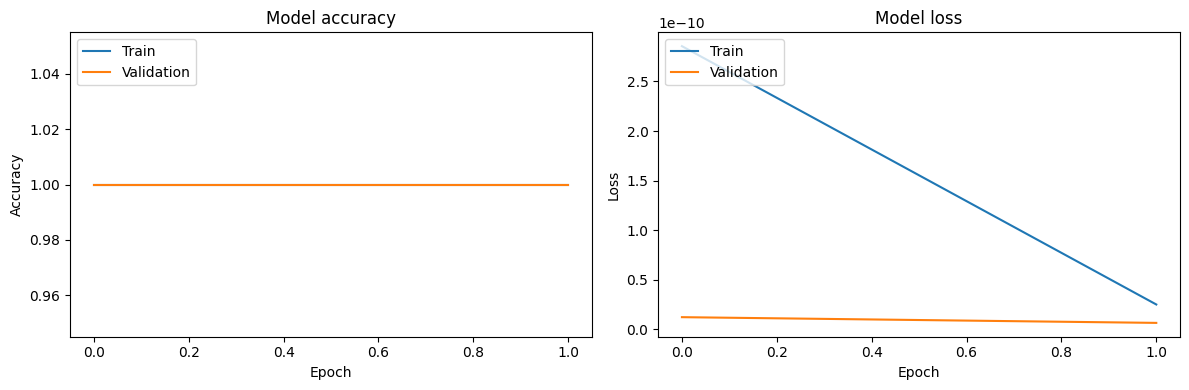

In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# **Prediction**

64/64 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step
F1 Score = 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2023

    accuracy                           1.00      2023
   macro avg       1.00      1.00      1.00      2023
weighted avg       1.00      1.00      1.00      2023



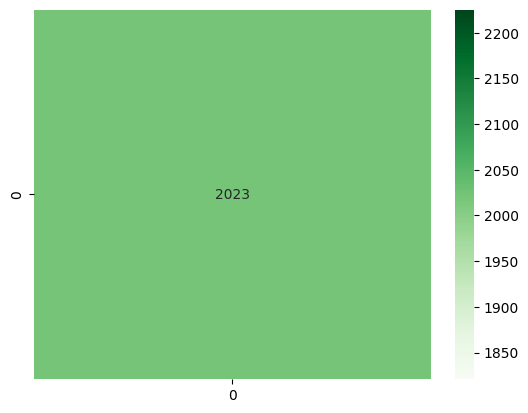

In [27]:
y_pred_prob = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = (y_pred_prob > 0.5).astype(int)  # For binary classification

# Get true labels
y_test = test_generator.classes

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
print(f'F1 Score = {f1:.2f}')

# Print classification report
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.show()

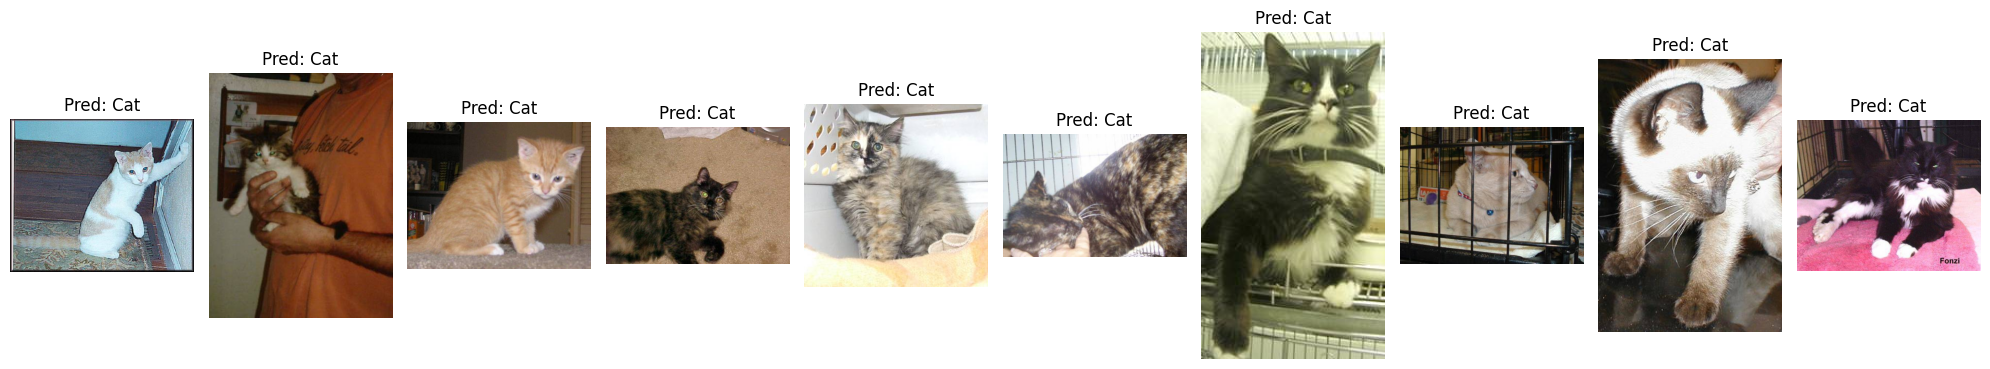

In [26]:
filenames = test_generator.filenames

# Number of images to display
num_images_to_display = 10

# Create a subplot grid
fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 10))

# Display images with predictions
for i in range(num_images_to_display):
    image_path = os.path.join('test_set', filenames[i])
    image = plt.imread(image_path)

    axes[i].imshow(image)
    predicted_label = 'Dog' if y_pred[i] == 1 else 'Cat'
    axes[i].set_title(f"Pred: {predicted_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()